<hr>
<div class="alert alert-block alert-success">
    <h4><b>Import libraries</b></h4>
</div>
<hr>

In [31]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Import dataset</b></h4>
    Load the data and store it in dataframe `df`:
</div>
<hr>

In [32]:
pd.options.display.max_columns = 50
df = pd.read_csv('data-final.csv', delimiter='\t')
df.drop(df.columns[50:], axis=1, inplace=True)
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


<hr>
<div class="alert alert-block alert-success">
    <h4><b>Identify and handle missing values</b></h4>
</div>
<hr>

In [33]:
print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Is there any missing value?  True
How many missing values?  89150
Number of participants after eliminating missing values:  1013558


<hr>
<div class="alert alert-block alert-success">
    <h4><b>Clustering</b></h4>
    <b>Creating K-means Cluster Model</b>
    <br>
    <i> <b>K-means</b></i> is a <i>centroid-based algorithm</i>, or a <i>distance-based algorithm</i>, where we <i><b>calculate the distances to assign a point to a cluster</b></i>. 
<br>
<br>
In K-Means, each cluster is associated with a centroid.
</div>
<hr>

In [34]:
df_model = df.copy()

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Fit Model</b></h4>
</div>
<hr>

In [35]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

C:\Users\Jiv Dela Cruz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<hr>
<div class="alert alert-block alert-success">
    <h4><b>Predicting the clusters</b></h4>
</div>
<hr>

In [36]:
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,...,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,...,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,...,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,...,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,...,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,...,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,...,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,2
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,...,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0,1
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,3.0,...,2.0,4.0,4.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,3.0,4.0,5.0,2
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,...,1.0,4.0,4.0,4.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0,2
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,...,4.0,2.0,3.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,0


<hr>
<div class="alert alert-block alert-success">
    <h4><b>Summing up the different question groups</b></h4>
</div>
<hr>

In [37]:
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums

,extroversion,neurotic,agreeable,conscientious,open,clusters
0,3.0,2.4,3.1,3.2,3.3,2
1,3.4,2.1,3.2,3.1,2.7,4
2,2.9,2.6,2.8,2.8,3.1,4
3,2.6,2.7,3.2,2.7,3.1,0
4,3.5,2.3,3.0,3.2,3.6,2
...,...,...,...,...,...,...
1015336,3.2,3.3,3.6,3.1,2.9,1
1015337,3.4,4.0,3.3,2.8,3.3,1
1015338,3.3,2.7,3.5,3.3,3.6,1
1015339,2.8,3.3,3.1,3.0,3.5,4


<hr>
<div class="alert alert-block alert-success">
    <h4><b>Analyze Clustered Data</b></h4>
</div>
<hr>

In [38]:
cluster0 = data_sums.loc[data_sums['clusters'] == 0]
cluster0.drop('clusters', axis=1, inplace=True)
cluster1 = data_sums.loc[data_sums['clusters'] == 1]
cluster1.drop('clusters', axis=1, inplace=True)
cluster2 = data_sums.loc[data_sums['clusters'] == 2]
cluster2.drop('clusters', axis=1, inplace=True)
cluster3 = data_sums.loc[data_sums['clusters'] == 3]
cluster3.drop('clusters', axis=1, inplace=True)
cluster4 = data_sums.loc[data_sums['clusters'] == 4]
cluster4.drop('clusters', axis=1, inplace=True)

C:\Users\Jiv Dela Cruz\AppData\Local\Temp\ipykernel_17800\3138681871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0.drop('clusters', axis=1, inplace=True)
C:\Users\Jiv Dela Cruz\AppData\Local\Temp\ipykernel_17800\3138681871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1.drop('clusters', axis=1, inplace=True)
C:\Users\Jiv Dela Cruz\AppData\Local\Temp\ipykernel_17800\3138681871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Visualization of Cluster 0</b></h4>
</div>
<hr>

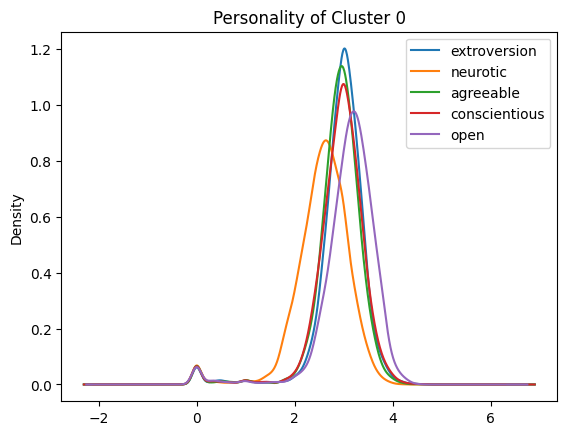

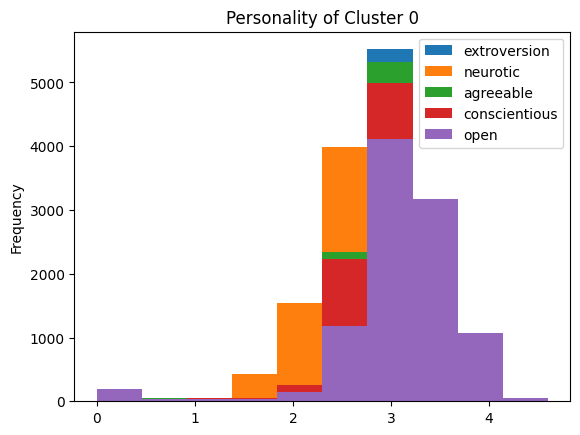

In [39]:
cluster0[:10025].plot(kind="kde", title='Personality of Cluster 0')
cluster0[:10025].plot(kind="hist", title='Personality of Cluster 0')
plt.show()

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Visualization of Cluster 1</b></h4>
</div>
<hr>

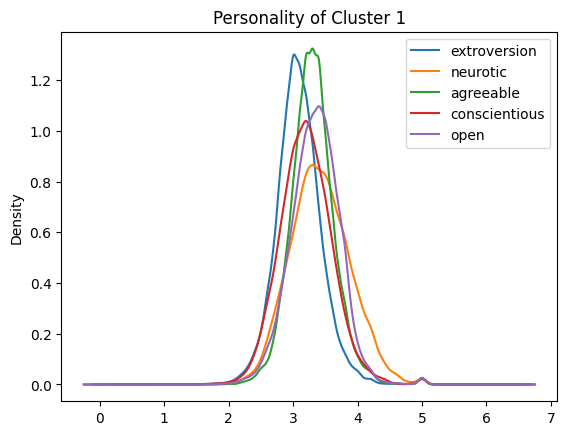

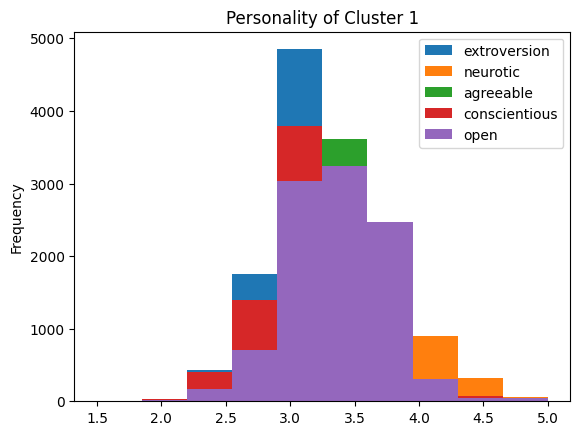

In [40]:
cluster1[:10025].plot(kind="kde", title='Personality of Cluster 1')
cluster1[:10025].plot(kind="hist", title='Personality of Cluster 1')
plt.show()

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Visualization of Cluster 2</b></h4>
</div>
<hr>

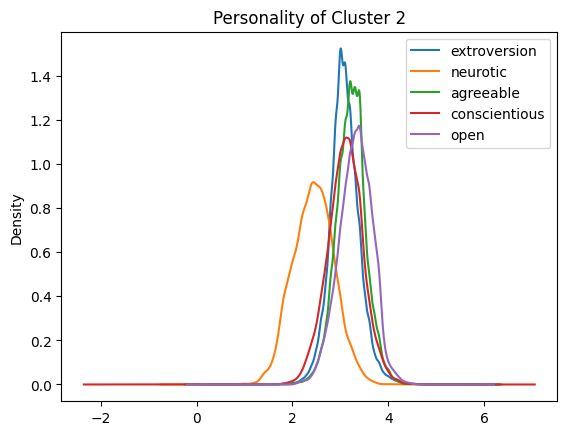

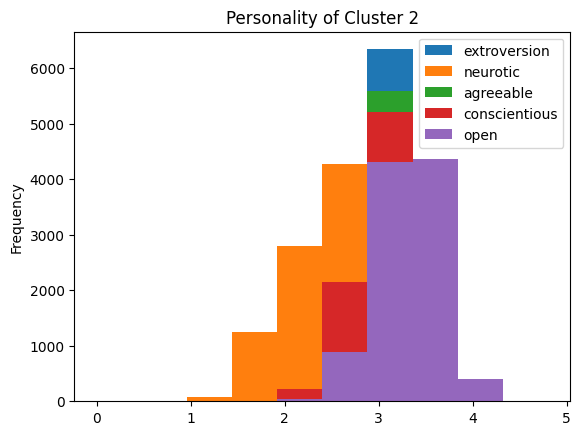

In [41]:
cluster2[:10025].plot(kind="kde", title='Personality of Cluster 2')
cluster2[:10025].plot(kind="hist", title='Personality of Cluster 2')
plt.show()

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Visualization of Cluster 3</b></h4>
</div>
<hr>

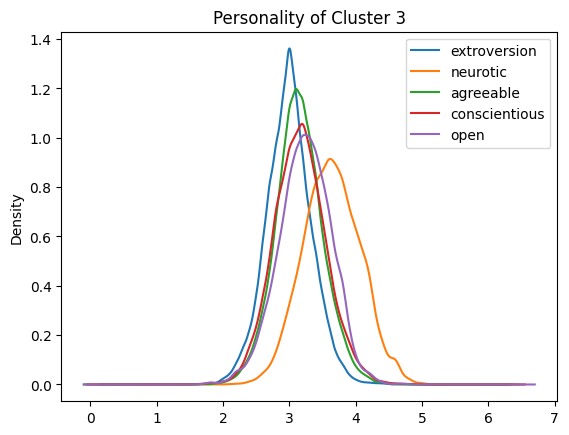

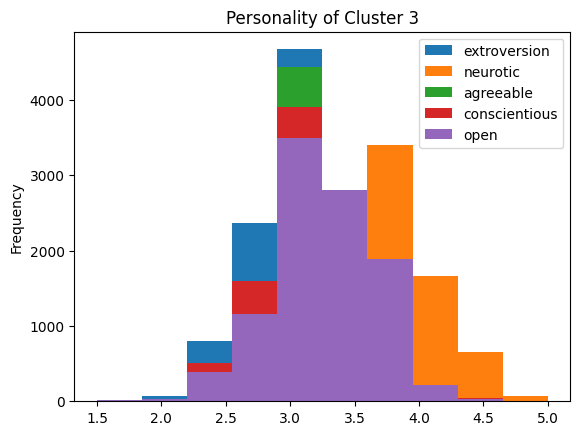

In [42]:
cluster3[:10025].plot(kind="kde", title='Personality of Cluster 3')
cluster3[:10025].plot(kind="hist", title='Personality of Cluster 3')
plt.show()

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Visualization of Cluster 4</b></h4>
</div>
<hr>

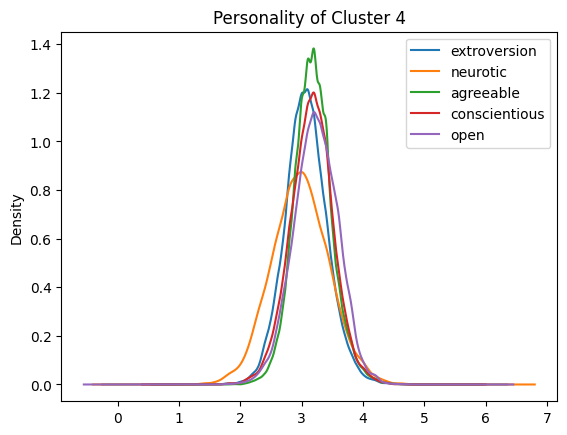

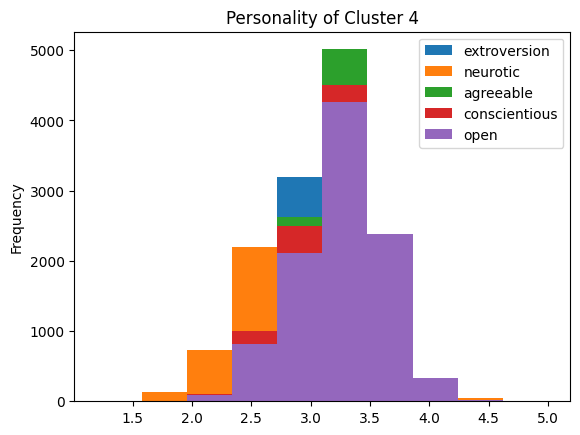

In [43]:
cluster4[:10025].plot(kind="kde", title='Personality of Cluster 4')
cluster4[:10025].plot(kind="hist", title='Personality of Cluster 4')
plt.show()

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Training and Testing</b></h4>
</div>
<hr>

In [44]:
X_train = data_sums.drop("clusters", axis=1)[203070:]
Y_train = data_sums["clusters"][203070:]
X_test = data_sums.drop("clusters", axis=1)[:203070]

print('X_train dimensions: ', X_train.shape)
print('Y_train dimensions: ', Y_train.shape)
print('X_test dimensions: ', X_test.shape)

X_train dimensions:  (810488, 5)
Y_train dimensions:  (810488,)
X_test dimensions:  (203070, 5)


<hr>
<div class="alert alert-block alert-success">
    <h4><b>Modelling</b></h4>
</div>
<hr>

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

<hr>
<div class="alert alert-block alert-success">
    <b>Logistic Regression</b>
<br>
<br>
    <b><i>Logistic Regression</i></b> is a binary classification algorithm used in supervised learning. It uses a logistic function to model a binary depdendent variable.
</div>
<hr>


In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\Jiv Dela Cruz\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


48.39

<hr>
<div class="alert alert-block alert-success">
    <b>Gaussian Naive Bayes</b>
<br>
<br>
    <b><i>Gaussian Naive Bayes</i></b> is a classification algorithm based on Bayes' Theorem with an assumption of independence among predictors. The Gaussian variant is used when the predictors follow a normal distribution.
</div>
<hr>


In [47]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

46.76

<hr>
<div class="alert alert-block alert-success">
    <b>Perceptron</b>
<br>
<br>
    <b><i>Perceptron</i></b> is a binary classification algorithm used in supervised learning. It's a type of linear classifier that predicts an output based on whether the input is above or below a certain threshold.
</div>
<hr>


In [48]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

30.64

<hr>
<div class="alert alert-block alert-success">
    <b>Stochastic Gradient Descent (SGD)</b>
<br>
<br>
    <b><i>Stochastic Gradient Descent (SGD)</i></b> is an optimization algorithm often used in machine learning models like linear regression, logistic regression, and support vector machines. It's used to minimize a function by iteratively moving in the direction of steepest descent.
</div>
<hr>


In [49]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

45.13

<hr>
<div class="alert alert-block alert-success">
    <b>Decision Tree</b>
<br>
<br>
    <b><i>Decision Tree</i></b> is a type of flowchart-like structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each lead node holds a class label.
</div>
<hr>


In [50]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

77.48

<hr>
<div class="alert alert-block alert-success">
    <h4><b>Model Selection</b></h4>
    Pick the most accurate model to use:
</div>
<hr>

In [51]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_log, acc_gaussian, acc_perceptron,
              acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,77.48
0,Logistic Regression,48.39
1,Naive Bayes,46.76
3,Stochastic Gradient Decent,45.13
2,Perceptron,30.64


<hr>
<div class="alert alert-block alert-success">
    <h4><b>Save Model</b></h4>
</div>
<hr>

In [52]:
pickle.dump(decision_tree, open('../../src/api/models/PersonalityTestModel.pkl', 'wb'))